In [1]:
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
model = load_model('./model.h5')

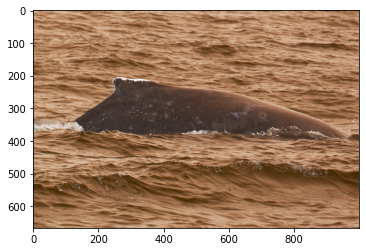

In [3]:
list_img_in_file = os.listdir('./images_to_predict')
image_list = []
for image in list_img_in_file:
    path = './images_to_predict/' + image
    image_list.append(cv2.imread(path))

plt.imshow(image_list[0]);

In [4]:
img_stadarized = []
for image in image_list:
    image = np.array([cv2.resize(image, (100, 100))/255.0])
    img_stadarized.append(image)

In [5]:
predictions = []
for image in img_stadarized:
    prediction = model.predict(image).round(3)
    prediction = prediction.reshape(3)
    predictions.append(list(prediction))
predictions = np.array(predictions)


In [6]:
prediction_proba_df = pd.DataFrame(predictions , index= list_img_in_file , columns= ['Dolphin' , 'Whale' , 'Beluga'])
prediction_proba_df

,Dolphin,Whale,Beluga
00405189464f9d.jpg,0.000,1.000,0.000
00e67227918b41.jpg,0.975,0.025,0.000
00eb3441343226.jpg,0.002,0.387,0.611
00eb689c10db84.jpg,0.106,0.894,0.000
00eb80dafb4fda.jpg,0.000,0.000,1.000
00eea1a5b9d8bc.jpg,0.937,0.063,0.000
